In [11]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [5]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [6]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [7]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [8]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [9]:
# What is the empirical range of dates?

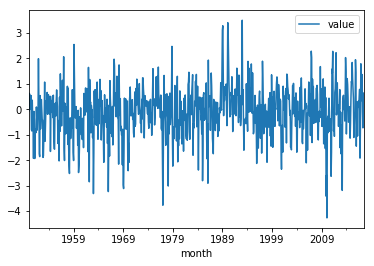

In [12]:
# How to visualize?
data.plot()

In [7]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
data['1951-11-11':'1951-11-12']

,value
month,


In [9]:
# What if we want a period index?
data_pd = data.to_period()

In [10]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [11]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [ ]:
# Which is more appropriate for this data?

# Period as this is data for change in value over time

In [12]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
79.7 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
infer_datetime_format = False, no date parser
75.1 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
infer_datetime_format = True, date parser provided
92.4 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
infer_datetime_format = False, date parser provided
92.5 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [14]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

In [ ]:
# Does it work with other column names?

In [15]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [54]:
# 1. plot 2. get range of dates 3. convert between time and period index
import pandas_datareader as pdr
test_import = pdr.get_data_yahoo('GOOG')
test_import.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
2010-01-11,301.101410,301.101410,295.910858,299.432648,299.432648,14479800
2010-01-12,297.709106,297.963165,292.902130,294.137512,294.137512,9742900
2010-01-13,287.168610,293.091431,285.878448,292.448822,292.448822,13041800
2010-01-14,290.859772,295.990540,290.316833,293.823669,293.823669,8511900


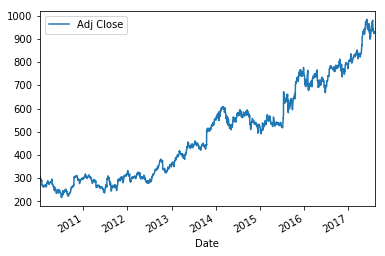

In [55]:
test_import.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
test_import.plot()

In [56]:
test_import_pd = test_import.to_period(freq='M')
test_import_pd.head(10)

,Adj Close
Date,
2010-01,312.204773
2010-01,310.829926
2010-01,302.994293
2010-01,295.940735
2010-01,299.885956
2010-01,299.432648
2010-01,294.137512
2010-01,292.448822
2010-01,293.823669


In [69]:
sample_dates = pd.date_range(start=test_import.index[0], end=test_import.index[-1], freq='M')
sample_dates

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
      

In [46]:
test_import_pd.index

PeriodIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
             '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
             '2010-01-14', '2010-01-15',
             ...
             '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
             '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
             '2017-08-07', '2017-08-08'],
            dtype='period[D]', name='Date', length=1913, freq='D')

In [70]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [71]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [72]:
# It will save you when it can
ts.ix[0:10:2].index

/Users/alessandropapa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')